# Lab 4 (2/3): dplyr

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu
    

In [1]:
library(tidyverse)

# Sample 1200 rows
set.seed(306)
rand_idx = sample(1:nrow(diamonds), 1200)
dm = diamonds[rand_idx, ]
dim(dm)
head(dm)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] 1200   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.70,Ideal,I,VS1,63.0,55,12030,7.75,7.54,4.76
0.72,Good,H,SI2,57.9,58,2056,5.98,5.91,3.44
0.91,Very Good,F,SI2,61.4,60,3726,6.13,6.16,3.77
0.70,Very Good,H,VS1,61.5,58,2394,5.66,5.72,3.50
0.43,Very Good,H,SI1,61.5,58,716,4.80,4.86,2.97
1.03,Very Good,D,VS1,59.6,61,6848,6.57,6.62,3.93


## Statistical transformations
Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the `stat` argument in the documentation. For example, `geom_bar`'s default value for stat is `'count'`, which means that `geom_bar()` uses `stat_count()`.

`stat_count` is documented on the same page as `geom_bar`, and if you scroll down you can find a section called "Computed Variables." Here we can see that `stat_count` computes two extra variables: `count` and `prop`.

In [2]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

print(popn)

# A tibble: 5 x 2
  country      population
  <chr>             <dbl>
1 ETHIOPIA      102000000
2 NIGERIA       186000000
3 EGYPT          96000000
4 DR CONGO       78000000
5 SOUTH AFRICA   56000000


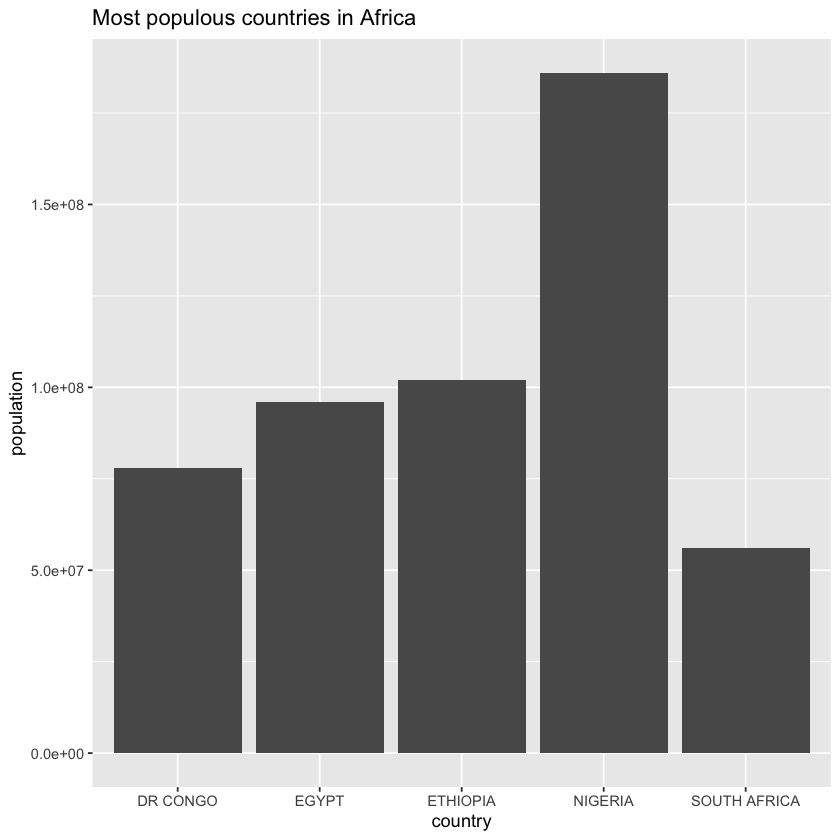

In [121]:
ggplot(popn, aes(x=country, y=population)) +
  geom_bar(stat='identity') +   # Could use geom_col() instead
  ggtitle('Most populous countries in Africa')

Question: Can you guess what the output of the following commands will be?

In [ ]:
ggplot(popn, aes(x=country, y=population)) +
  geom_bar()

In [ ]:
ggplot(popn, aes(x=country)) +
  geom_bar()

### The group aesthetic

In the previous lecture, we used the following code to plot the proportions of each cut in the diamonds dataset.

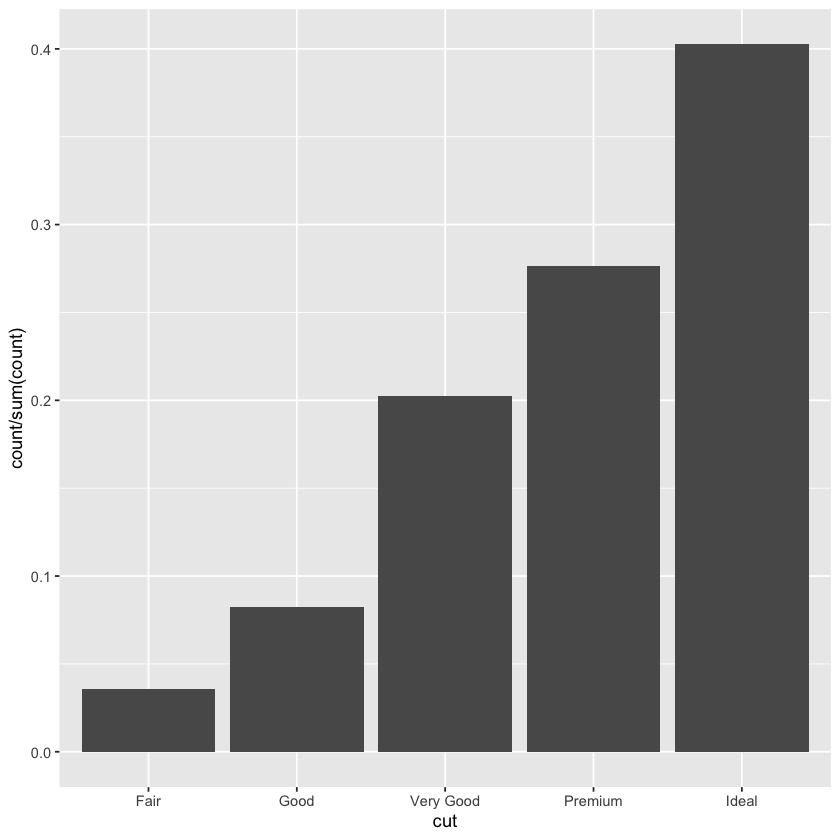

In [8]:
ggplot(data=dm, aes(x=cut)) + 
    geom_bar(aes(y=..count../sum(..count..)))

Question: You might've noticed that `prop` is directly calculated by the `stat_count` function. So why can't we use the following code to directly plot the proportions?

What would we have to add to fix it?

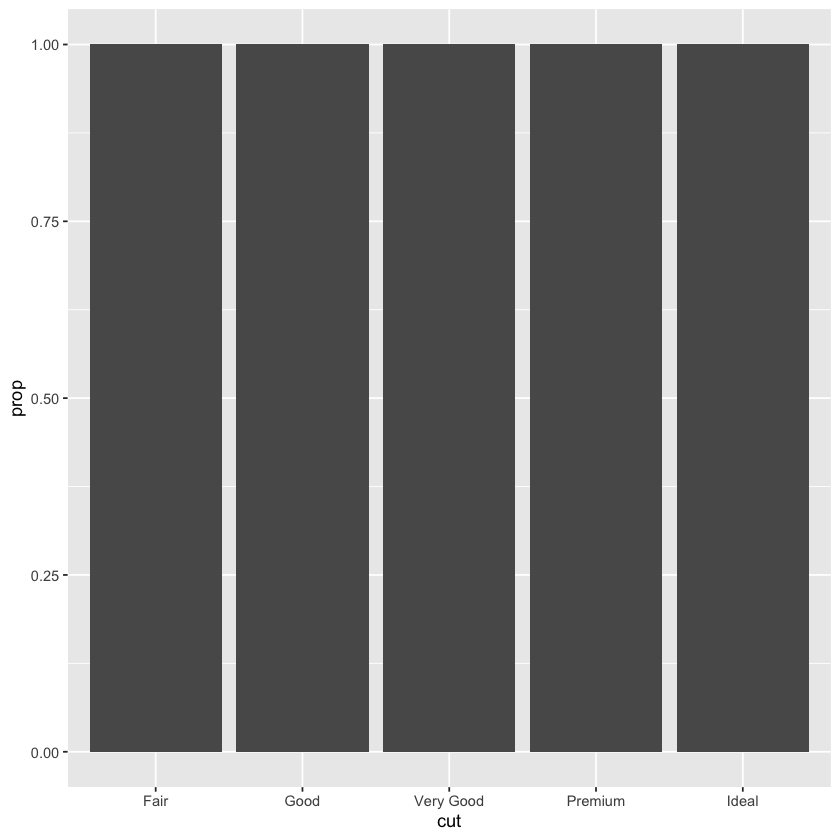

In [10]:
ggplot(data=dm, aes(x=cut)) + 
    geom_bar(aes(y=..prop..))

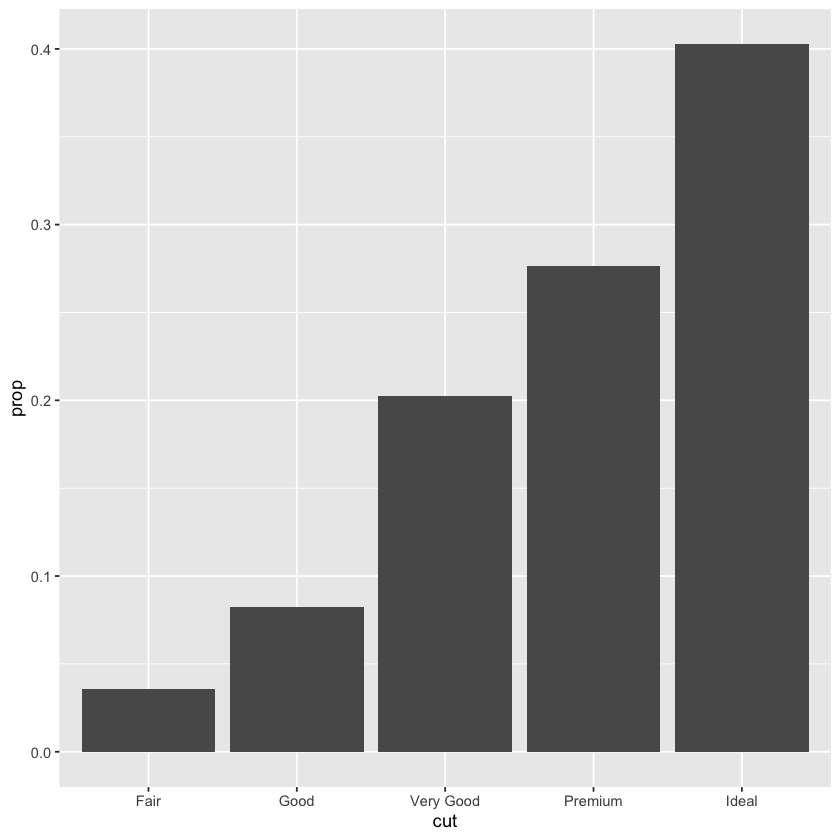

In [12]:
ggplot(data=dm, aes(x=cut)) + 
    geom_bar(aes(y=..prop.., group=1))

### Other summary stats

You may want to apply your own stat functions to the data. For this, you can use `stat_summary()` to apply any summary function, including custom-made ones, to the data for each `x` value.

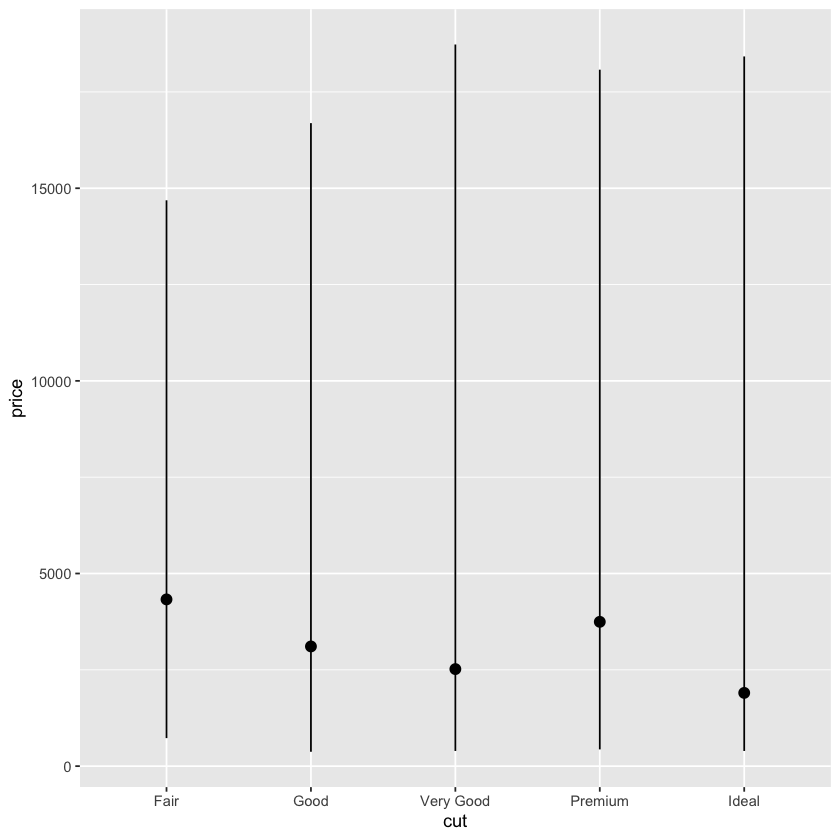

In [13]:
ggplot(dm, aes(x=cut, y=price)) +
    stat_summary(
        fun.ymin=min,
        fun.ymax=max,
        fun.y=median
    )

# dplyr for data manipulation

In [14]:
dim(dm)
head(dm)

[1] 1200   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.70,Ideal,I,VS1,63.0,55,12030,7.75,7.54,4.76
0.72,Good,H,SI2,57.9,58,2056,5.98,5.91,3.44
0.91,Very Good,F,SI2,61.4,60,3726,6.13,6.16,3.77
0.70,Very Good,H,VS1,61.5,58,2394,5.66,5.72,3.50
0.43,Very Good,H,SI1,61.5,58,716,4.80,4.86,2.97
1.03,Very Good,D,VS1,59.6,61,6848,6.57,6.62,3.93


There are five main functions we will focus on in `dplyr`: `filter`, `arrange`, `select`, `mutate` and `summarize`. all of them have the following properties:
1. The first argument is a dataframe.
2. The subsequent arguments describe what to do with the data, using the variable names in the dataframe.
3. The result is a new data frame.

Note that the documentation for these functions can be found at https://dplyr.tidyverse.org/reference/.

## Filter

Used if you want to view or store a new dataset containing a subset of the rows of a dataset according to some condition.

In [15]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.00,Fair,J,SI1,66.4,55.0,11189,7.82,7.67,5.15
0.99,Fair,J,I1,62.9,58.0,1901,6.33,6.10,3.91
1.51,Fair,J,SI1,63.4,60.0,6976,7.31,7.18,4.59
1.30,Fair,J,SI1,66.0,57.1,5488,6.73,6.82,4.45


Remember to assign the result to a variable name if you want to store the subset for later use.

Also make sure to use `==` instead of `=` inside the `filter` function. The former is to test equality while the latter is for assignments.

In [16]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')
worst_diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.00,Fair,J,SI1,66.4,55.0,11189,7.82,7.67,5.15
0.99,Fair,J,I1,62.9,58.0,1901,6.33,6.10,3.91
1.51,Fair,J,SI1,63.4,60.0,6976,7.31,7.18,4.59
1.30,Fair,J,SI1,66.0,57.1,5488,6.73,6.82,4.45


In [25]:
## filtering for rows that satisfy one or both of the conditions
a = filter(dm, color == 'D' | color == 'J') 

## filtering for rows that satisfy both conditions
b = filter(dm, color == 'D' & cut == 'Ideal') 
# b = filter(dm, color == 'D', cut == 'Ideal') 

## filtering for rows that satisfy exactly one condition
c = filter(dm, xor(color == 'D', cut == 'Ideal')) 

## filtering using membership condition
best_cuts = filter(dm, !(cut %in% c('Premium', 'Ideal'))) 

## can do this because cut is an ordinal variable
is.ordered(dm$cut)
levels(dm$cut)
good_or_better_cuts = filter(dm, cut > 'Good') 

[1] TRUE

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

Note: `NA` is generally used to denote missing values in R. Never check for missing values using `variable == NA` or `variable != NA`. Instead, use the `is.na` function. So use `is.na(variable)` or `!is.na(variable)`.

In [26]:
df = tibble(x = c(1, NA, 3, NA, 5), y=c('a', 'b', 'c', 'd', 'e'))
df

x,y
<dbl>,<chr>
1,a
NA,b
3,c
NA,d
5,e


In [23]:
filter(df, is.na(x))

x,y
<dbl>,<chr>
NA,b
NA,d


In [24]:
filter(df, !is.na(x))

x,y
<dbl>,<chr>
1,a
3,c
5,e


## Arrange

Used to reorder rows.

In [33]:
dm_order = arrange(dm, cut, carat)
head(dm_order, 10)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.30,Fair,D,VVS2,65.2,59.0,772,4.20,4.18,2.73
0.48,Fair,G,VVS2,65.0,54.0,1367,4.95,4.90,3.20
0.50,Fair,D,SI1,64.6,59.0,1253,4.93,4.95,3.19
0.50,Fair,G,I1,65.2,56.0,727,4.95,4.89,3.21
0.52,Fair,F,SI2,56.3,59.0,975,5.41,5.35,3.03
0.53,Fair,E,SI1,56.2,64.0,1286,5.43,5.41,3.05
0.63,Fair,E,SI1,64.6,57.7,1952,5.36,5.41,3.47
0.70,Fair,H,SI1,65.3,55.0,1865,5.58,5.54,3.63
0.70,Fair,H,SI1,66.0,56.0,1840,5.50,5.53,3.64


In [32]:
dm_order2 = arrange(dm, desc(cut), desc(carat))
head(dm_order2, 10)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.30,Ideal,G,SI2,61.6,57,15433,8.47,8.41,5.20
2.29,Ideal,J,SI2,62.3,57,13200,8.39,8.43,5.24
2.26,Ideal,H,SI2,62.2,56,17312,8.38,8.35,5.20
2.18,Ideal,J,VS2,60.3,57,16427,8.41,8.45,5.08
2.07,Ideal,J,VVS2,62.7,54,16769,8.17,8.12,5.11
2.05,Ideal,G,SI2,61.6,56,18181,8.16,8.11,5.01
2.05,Ideal,H,SI1,61.9,57,17006,8.09,8.14,5.02
2.02,Ideal,G,VS2,61.7,53,18077,8.14,8.04,4.99
2.01,Ideal,F,SI2,61.7,56,18394,8.12,8.16,5.02


Note that missing values are always sorted to the end, regardless of desired order

In [34]:
arrange(df, x)

x,y
<dbl>,<chr>
1,a
3,c
5,e
NA,b
NA,d


In [35]:
arrange(df, desc(x))

x,y
<dbl>,<chr>
5,e
3,c
1,a
NA,b
NA,d


## Select
This is used to select certain columns out of a dataset.

In [36]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [38]:
dm2 = select(dm, carat, price)
head(dm2)

carat,price
<dbl>,<int>
1.70,12030
0.72,2056
0.91,3726
0.70,2394
0.43,716
1.03,6848


In [39]:
dm3 = select(dm, color:price)
head(dm3)

color,clarity,depth,table,price
<ord>,<ord>,<dbl>,<dbl>,<int>
I,VS1,63.0,55,12030
H,SI2,57.9,58,2056
F,SI2,61.4,60,3726
H,VS1,61.5,58,2394
H,SI1,61.5,58,716
D,VS1,59.6,61,6848


In [49]:
select(dm, -(color:price))[1:3,]

carat,cut,x,y,z
<dbl>,<ord>,<dbl>,<dbl>,<dbl>
1.70,Ideal,7.75,7.54,4.76
0.72,Good,5.98,5.91,3.44
0.91,Very Good,6.13,6.16,3.77


In [48]:
select(dm, starts_with('c'))[1:3,]

carat,cut,color,clarity
<dbl>,<ord>,<ord>,<ord>
1.70,Ideal,I,VS1
0.72,Good,H,SI2
0.91,Very Good,F,SI2


In [47]:
select(dm, contains('co'))[1:3,]

color
<ord>
I
H
F


Use `rename()`, which is a variant of `select()`, to rename a column and keep all the variables that aren't explicitly mentioned:

In [45]:
rename(dm, width=x)[1:3,]

carat,cut,color,clarity,depth,table,price,width,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.70,Ideal,I,VS1,63.0,55,12030,7.75,7.54,4.76
0.72,Good,H,SI2,57.9,58,2056,5.98,5.91,3.44
0.91,Very Good,F,SI2,61.4,60,3726,6.13,6.16,3.77


In [46]:
select(dm, width=x)[1:3,]

width
<dbl>
7.75
5.98
6.13


The `everything()` helper function is often useful if you want to keep all the variables while making changes to some. For instance, if you want to move variables around.

In [50]:
select(dm,  everything(), width=x)[1:3,]

carat,cut,color,clarity,depth,table,price,width,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.70,Ideal,I,VS1,63.0,55,12030,7.75,7.54,4.76
0.72,Good,H,SI2,57.9,58,2056,5.98,5.91,3.44
0.91,Very Good,F,SI2,61.4,60,3726,6.13,6.16,3.77


In [51]:
select(dm, price, carat, everything())[1:3,]

price,carat,cut,color,clarity,depth,table,x,y,z
<int>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12030,1.70,Ideal,I,VS1,63.0,55,7.75,7.54,4.76
2056,0.72,Good,H,SI2,57.9,58,5.98,5.91,3.44
3726,0.91,Very Good,F,SI2,61.4,60,6.13,6.16,3.77



### Mutate

Create a new column or change an existing column.

In [52]:
dm_dim = select(dm, -(carat:price))
head(dm_dim)

x,y,z
<dbl>,<dbl>,<dbl>
7.75,7.54,4.76
5.98,5.91,3.44
6.13,6.16,3.77
5.66,5.72,3.50
4.80,4.86,2.97
6.57,6.62,3.93


In [53]:
mutate(dm_dim, volume = x*y*z)[1:3,]

x,y,z,volume
<dbl>,<dbl>,<dbl>,<dbl>
7.75,7.54,4.76,278.1506
5.98,5.91,3.44,121.5758
6.13,6.16,3.77,142.3582


If you only want to keep the new variables, use `transmute()`.

In [55]:
transmute(dm_dim, volume = x*y*z)[1:3,]

volume
<dbl>
278.1506
121.5758
142.3582


In [56]:
mutate(dm_dim, z = x+y)[1:3,]

x,y,z
<dbl>,<dbl>,<dbl>
7.75,7.54,15.29
5.98,5.91,11.89
6.13,6.16,12.29


## Summarize

Calculates summary statistics. Generally used with the `group_by()` function to output summaries by group.

In [57]:
dm_by_color = group_by(dm, color)

In [60]:
head(dm_by_color)
group_vars(dm_by_color)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.70,Ideal,I,VS1,63.0,55,12030,7.75,7.54,4.76
0.72,Good,H,SI2,57.9,58,2056,5.98,5.91,3.44
0.91,Very Good,F,SI2,61.4,60,3726,6.13,6.16,3.77
0.70,Very Good,H,VS1,61.5,58,2394,5.66,5.72,3.50
0.43,Very Good,H,SI1,61.5,58,716,4.80,4.86,2.97
1.03,Very Good,D,VS1,59.6,61,6848,6.57,6.62,3.93


[1] "color"

In [61]:
summarize(dm_by_color, avg_price=mean(price, na.rm=TRUE))

color,avg_price
<ord>,<dbl>
D,3623.041
E,3147.318
F,3469.746
G,4106.905
H,4973.397
I,5011.656
J,6279.825


In [62]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [68]:
mpg2 = mutate(mpg, year=factor(year))

mpg2 = mutate(mpg2, manual=(str_detect(trans, 'manual')))

head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
<chr>,<chr>,<dbl>,<fct>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [69]:
mpg2_by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarize(mpg2_by_maker_yr,
                        count = n(),
                        hwy = mean(hwy, na.rm=TRUE),
                        cty = mean(cty, na.rm=TRUE))
head(hwy_summary)

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238


In [70]:
print(group_vars(mpg2_by_maker_yr))
print(group_vars(hwy_summary))

[1] "manufacturer" "year"        
[1] "manufacturer"


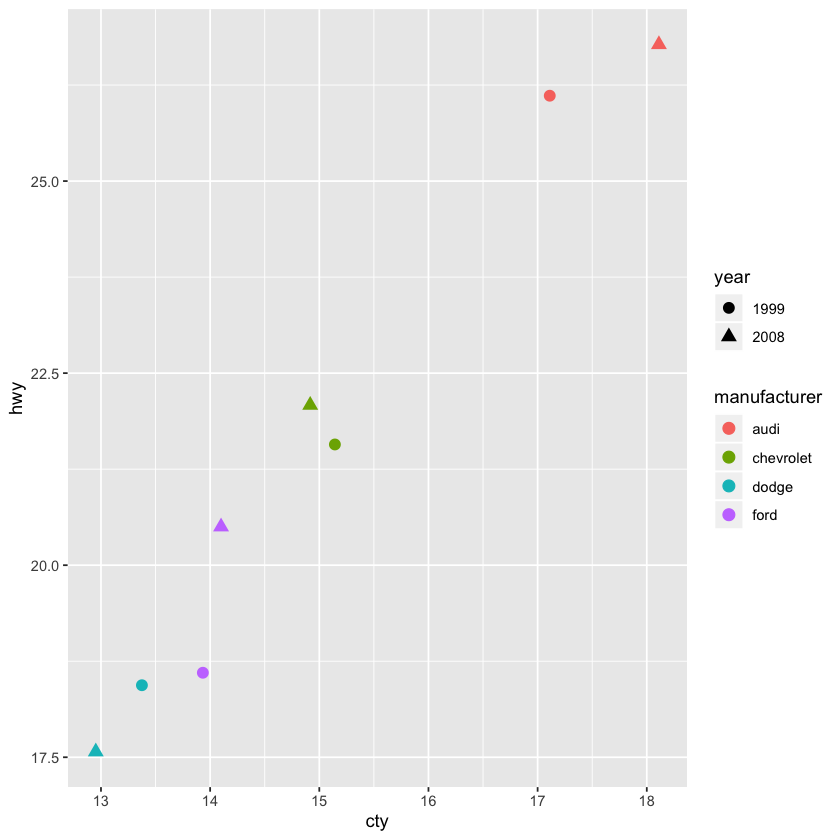

In [75]:
hwy_summary_af = filter(hwy_summary, str_detect(manufacturer, '^[a-f]'))

ggplot(hwy_summary_af, aes(x=cty, y=hwy, color=manufacturer, shape=year)) + 
    geom_point(size=3)

## Pipes
`tidyverse` provides shortcuts for performing multiple operators on a dataset in the form of pipes. This can be used with any of the dataset functions we have learned today, where the syntax is:

In [76]:
mpg2_by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarize(mpg2_by_maker_yr,
                        count = n(),
                        hwy = mean(hwy, na.rm=TRUE),
                        cty = mean(cty, na.rm=TRUE))
hwy_summary_af = filter(hwy_summary, str_detect(manufacturer, '^[a-f]'))


hwy_summary_af2 = mpg2 %>% 
    group_by(manufacturer, year) %>%
    summarize(
        count = n(),
        hwy = mean(hwy, na.rm=TRUE),
        cty = mean(cty, na.rm=TRUE)) %>%
    filter(str_detect(manufacturer, '^[a-f]'))

In [78]:
hwy_summary_af
hwy_summary_af2

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


### Exercise 1
What is the default geom associated with `stat_summary()`? Can you modify the below code to make a line plot of the median `hwy` by `cyl` (just plot the line through the medians)? Note that you can remove the `fun.ymax` and `fun.ymin` arguments.


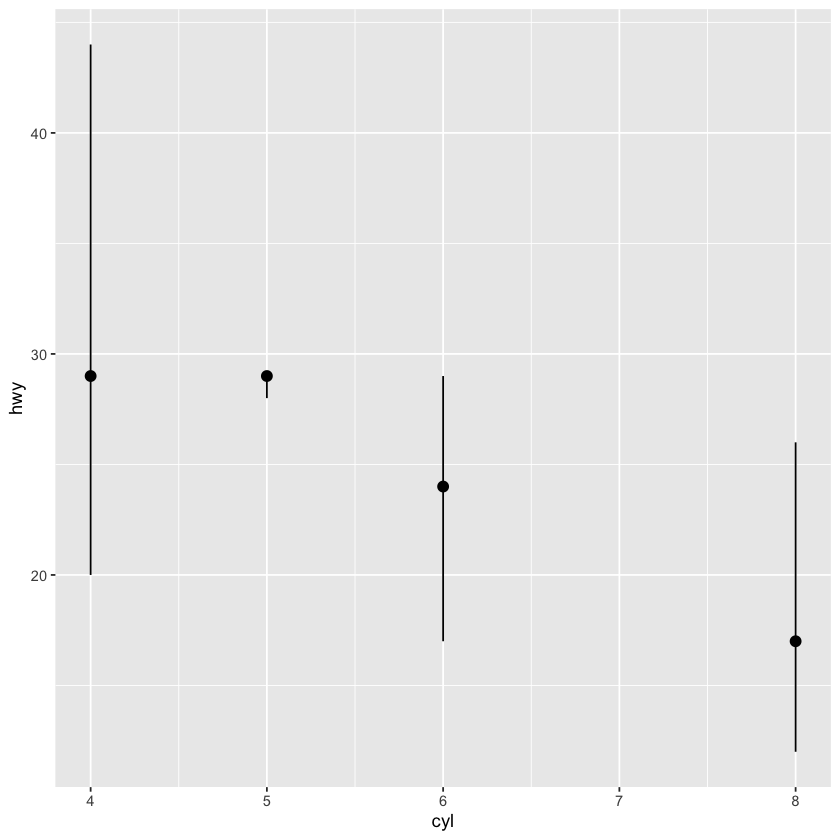

In [87]:
ggplot(mpg, aes(x=cyl, y=hwy)) +
    stat_summary(
        fun.ymin=min,
        fun.ymax=max,
        fun.y=median
    )

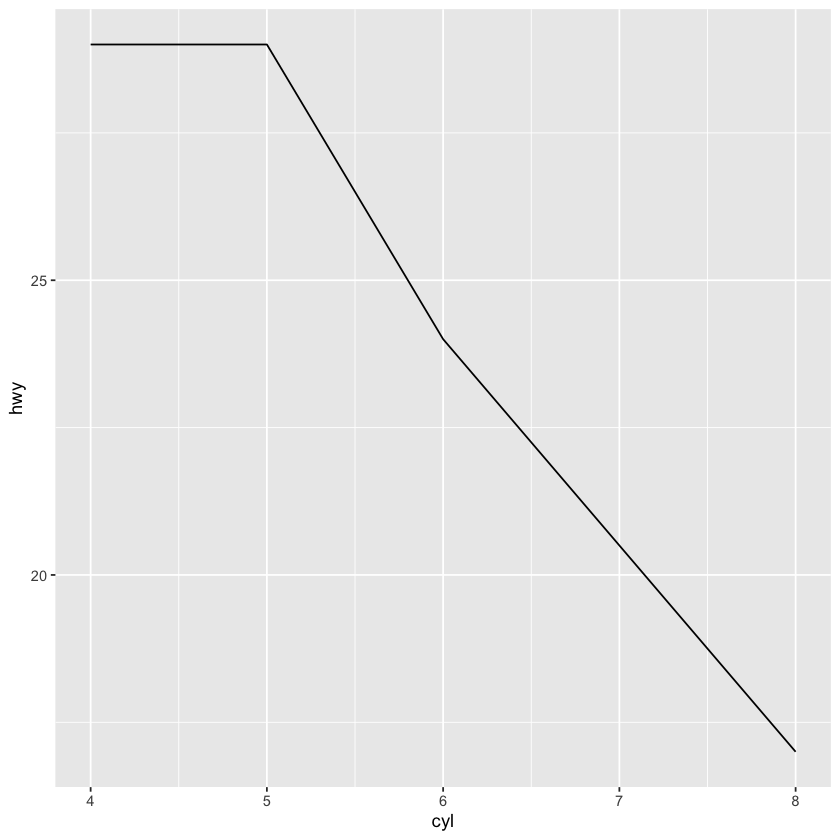

In [125]:
ggplot(mpg, aes(x=cyl, y=hwy)) +
    stat_summary(fun.y=median, geom='line')

### Exercise 2

Using the dataset `dm`:
1. Use `filter` to output diamonds with combined `x` and `y` values greater than 17.
2. Use `filter` and `nrow` to count the number of diamonds that sold for an even price. 

In [88]:
filter(dm, x+y>17)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.65,Premium,G,SI2,62.0,61,16314,8.82,8.75,5.45
2.36,Good,J,SI2,58.9,64,12286,8.75,8.68,5.14
2.41,Premium,I,SI2,60.7,59,13563,8.70,8.64,5.26
2.39,Premium,H,SI1,61.8,58,15917,8.57,8.52,5.28
2.31,Premium,H,SI2,59.2,61,13831,8.65,8.57,5.10
4.01,Premium,J,I1,62.5,62,15223,10.02,9.94,6.24


In [90]:
nrow(filter(dm, price %% 2 == 0))

[1] 637

### Exercise 3
Add a new column to `dm` that converts the US dollar prices in `price` to Korean Won and rounds to the nearest thousand. Today's exchange rate is 1 USD = 1,195.33 WON. If you don't know how to round numbers in R, try searching the internet for what function to use and its documentation.

In [92]:
dm = mutate(dm, price_won=round(1195.33*price, -3))

head(dm)

carat,cut,color,clarity,depth,table,price,x,y,z,price_won
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1.70,Ideal,I,VS1,63.0,55,12030,7.75,7.54,4.76,14380000
0.72,Good,H,SI2,57.9,58,2056,5.98,5.91,3.44,2458000
0.91,Very Good,F,SI2,61.4,60,3726,6.13,6.16,3.77,4454000
0.70,Very Good,H,VS1,61.5,58,2394,5.66,5.72,3.50,2862000
0.43,Very Good,H,SI1,61.5,58,716,4.80,4.86,2.97,856000
1.03,Very Good,D,VS1,59.6,61,6848,6.57,6.62,3.93,8186000


### Exercise 4

Using the dataset `dm` and pipes, create a dataset of the mean price by color for diamonds with `Ideal` cuts and carats greater than or equal to 1. Round the price to the nearest dollar.

In [100]:
answer = dm %>% filter(cut == 'Ideal', carat >= 1) %>%
    group_by(color) %>%
    summarize(price=round(mean(price)))

head(answer)

color,price
<ord>,<dbl>
D,9136
E,6582
F,9421
G,9085
H,8178
I,7637


### Exercise 5

When used on a grouped dataset, expressions within the mutate and filter commands are computed by group. Use this knowledge and the dataset `dm` to solve the following problem.

Only consider `subcompact` cars. Find which manufacturers had a car model/variant with a city mileage (`cty`) greater than one standard deviation over the average city mileage for that year. 

In [119]:
mpg %>% filter(class == 'subcompact') %>%
    group_by(year) %>%
    filter(cty > mean(cty) + sd(cty)) %>%
    distinct(manufacturer, year)

manufacturer,year
<chr>,<int>
honda,1999
honda,2008
volkswagen,1999


In [127]:
mpg %>% filter(class == 'subcompact') %>%
    group_by(year) %>%
    mutate(cutoff = mean(cty) + sd(cty)) %>%
    select(year, cutoff, everything())

year,cutoff,manufacturer,model,displ,cyl,trans,drv,cty,hwy,fl,class
<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1999,26.60461,ford,mustang,3.8,6,manual(m5),r,18,26,r,subcompact
1999,26.60461,ford,mustang,3.8,6,auto(l4),r,18,25,r,subcompact
2008,22.63378,ford,mustang,4.0,6,manual(m5),r,17,26,r,subcompact
2008,22.63378,ford,mustang,4.0,6,auto(l5),r,16,24,r,subcompact
1999,26.60461,ford,mustang,4.6,8,auto(l4),r,15,21,r,subcompact
1999,26.60461,ford,mustang,4.6,8,manual(m5),r,15,22,r,subcompact
2008,22.63378,ford,mustang,4.6,8,manual(m5),r,15,23,r,subcompact
2008,22.63378,ford,mustang,4.6,8,auto(l5),r,15,22,r,subcompact
2008,22.63378,ford,mustang,5.4,8,manual(m6),r,14,20,p,subcompact
